In [46]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [47]:
import pandas as pd
df = pd.read_csv('train.csv',header= 0)
df_test = pd.read_csv('test.csv',header= 0)
both = [df, df_test]
pas = df_test['PassengerId'].tolist()
df.describe()
df.head()
df.info()
df_test.info()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [117]:
df.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
for cols in ['Pclass','SibSp','Parch','Embarked']:
    df[[cols,'Survived']].groupby([cols],as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


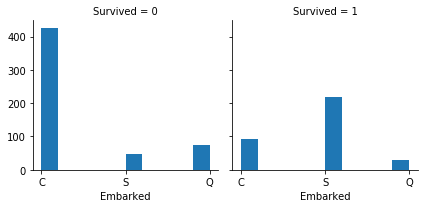

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.FacetGrid(df, col='Survived')
#g.map(plt.hist, 'Age', bins=20)
g.map(plt.hist, 'Embarked')


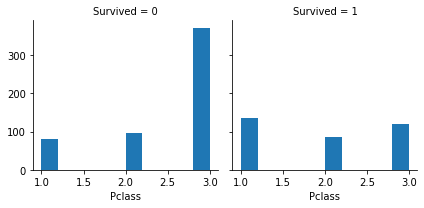

In [93]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Pclass')

In [48]:
for dataset in both:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    dataset['Surname'] = dataset.Name.str.extract('([A-Za-z]+)\,', expand=False)
    dataset['Name_len'] = dataset['Name'].apply(lambda x: len(x))
    dataset['Fam_Num'] = dataset.groupby('Surname')['Surname'].transform('count')
    dataset['Fam_Size'] = dataset['SibSp']+dataset['Parch']
    dataset['Title'] = dataset['Title'].replace(['Don', 'Rev', 'Lady', 'Sir', 'Countess','Jonkheer'],'Dif')
    dataset['Title'] = dataset['Title'].replace([ 'Dr','Major', 'Col', 'Capt',],'Mil')
    dataset['Title'] = dataset['Title'].replace(['Ms','Mlle'],'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Fare'].fillna(dataset['Fare'].dropna().median(), inplace=True)
    dataset['Age'].fillna(dataset['Age'].dropna().median(), inplace=True)
    #dataset['Age*Class'] = dataset.Age * dataset.Pclass

    

#pd.crosstab(df['Title'], df['Sex'])
df.head()
df.Sex.unique()
df.isnull().sum(axis = 0)
df[['Age*Class', 'Survived']].groupby(['Age*Class'], as_index=False).mean().sort_values(by = 'Survived', ascending = False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Name_len,Fam_Num,Fam_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,23,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,51,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,22,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,44,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,24,2,0


array(['male', 'female'], dtype=object)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Surname          0
Name_len         0
Fam_Num          0
Fam_Size         0
dtype: int64

KeyError: "['Age*Class'] not in index"

In [49]:


for dataset in both:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
    dataset['Title'] = dataset['Title'].map( {'Mr': 1, 'Miss': 2,'Mrs': 3, 'Master': 4,'Dif': 5,'Mil':0} )#.astype(int)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 1, 'Q': 2,'C':3} ).astype(int)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Name_len,Fam_Num,Fam_Size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,1,Braund,23,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3,3,Cumings,51,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,2,Heikkinen,22,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,3,Futrelle,44,2,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,1,Allen,24,2,0


In [153]:


#concatenate age and its bin
df = pd.concat([df,categor],axis = 1)
df.head()
df[['FareBand','Survived']].groupby(['FareBand'],as_index = False).mean().sort_values(by = 'Survived', ascending = False)
df[['AgeBand','Survived']].groupby(['AgeBand'],as_index = False).mean().sort_values(by = 'Survived', ascending = False)

df.drop(['AgeBand','FareBand'], axis = 1) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Name_len,Fam_Num,Fam_Size,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,1,Braund,23,2,1,"(-1, 128]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3,3,Cumings,51,1,1,"(-1, 128]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,2,Heikkinen,22,1,0,"(-1, 128]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,3,Futrelle,44,2,1,"(-1, 128]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,1,Allen,24,2,0,"(-1, 128]"


,FareBand,Survived
3,"(385, 1000]",1.000000
1,"(128, 256]",0.724138
2,"(256, 385]",0.666667
0,"(-1, 128]",0.368113


KeyError: "['AgeBand'] not in index"

In [178]:

for dataset in both:  
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Age'] = dataset['Age'].astype(int)
    #dataset.loc[ dataset['Age'] <= 2, 'Age'] = 0
    #dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    #dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    #dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    #dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset.loc[dataset['Age'] < 18, 'Age'] = 0
    dataset.loc[ dataset['Age'] >= 18, 'Age'] = 1

    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3

    dataset.loc[ dataset['Name_len'] <= 29, 'Name_len'] = 0
    dataset.loc[(dataset['Name_len'] > 29) & (dataset['Name_len'] <= 47), 'Name_len'] = 1
    dataset.loc[(dataset['Name_len'] > 47) & (dataset['Name_len'] <= 64), 'Name_len'] = 2
    dataset.loc[dataset['Name_len'] > 64, 'Name_len'] = 3

    #dataset.loc[ dataset['Fam_Size'] == 0 , 'Fam_Size'] = 0
    #dataset.loc[ dataset['Fam_Size'] > 0 , 'Fam_Size'] = 1
    #dataset.head()

    


df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Name_len,Fam_Num,Fam_Size
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,1,1,Braund,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,3,C85,3,3,Cumings,2,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,0,NaN,1,2,Heikkinen,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,3,C123,1,3,Futrelle,1,2,1
4,5,0,3,"Allen, Mr. William Henry",0,1,0,0,373450,1,NaN,1,1,Allen,0,2,0


In [50]:
df.drop(['PassengerId','Name','Ticket','Cabin','Surname','SibSp','Parch'], axis = 1,inplace = True)
pas = df_test['PassengerId'].tolist()
df_test.drop(['PassengerId','Name','Ticket','Cabin','Surname','SibSp','Parch'], axis = 1,inplace = True)

df.isnull().sum(axis = 0)
df.head()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
Name_len    0
Fam_Num     0
Fam_Size    0
dtype: int64

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Name_len,Fam_Num,Fam_Size
0,0,3,0,22.0,7.2500,1,1,23,2,1
1,1,1,1,38.0,71.2833,3,3,51,1,1
2,1,3,1,26.0,7.9250,1,2,22,1,0
3,1,1,1,35.0,53.1000,1,3,44,2,1
4,0,3,0,35.0,8.0500,1,1,24,2,0


In [60]:
Y_train = df["Survived"]
X_train = df[['Sex']]#df.drop("Survived", axis=1)
X_test = df_test[['Sex']]
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier




In [61]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
#Y_pred = logreg.predict(df_test)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

78.68

In [8]:
coeff_df = pd.DataFrame(df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.008757
5,Title,0.554905
4,Embarked,0.252272
6,Name_len,0.026138
3,Fare,0.003557
2,Age,-0.034780
7,Fam_Num,-0.124342
8,Fam_Size,-0.270030
0,Pclass,-0.951827


In [17]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(df_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

95.62

In [63]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
#Y_pred = knn.predict(df_test)
Y_pred = logreg.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

78.68

In [62]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
#Y_pred = decision_tree.predict(df_test)
Y_pred = logreg.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

78.68

In [12]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(df_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest
len(Y_pred)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.9966329966329966

99.66

418

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

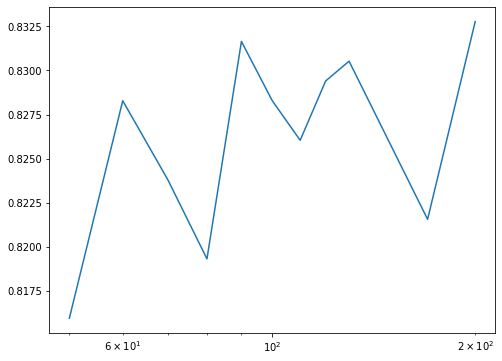

In [35]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
alphas = [50,60,70,80,90,100,110,120,130,170,200]
import matplotlib.pyplot as plt
tuned_parameters = [{'n_estimators': alphas}]
n_folds = 5

clf = GridSearchCV(random_forest, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, Y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
plt.show()

In [148]:
import numpy as np
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.239
Sex,0.159
Pclass,0.120
Fam_Num,0.107
Fam_Size,0.100
Fare,0.090
Age,0.081
Name_len,0.054
Embarked,0.050


In [13]:

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=2)


model.fit(X_train, Y_train)
pred = model.predict(X_train)
y_pred = model.predict(df_test)
predictions = [round(value) for value in y_pred]


accuracy = accuracy_score(Y_train, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2,
              silent=None, subsample=0.8, verbosity=1)

Accuracy: 99.66%


In [37]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'n_estimators' : range(50,200,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, Y_train)
gsearch1.best_params_, gsearch1.best_score_

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators': range(50, 200, 

({'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 150},
 0.8804943342242435)

In [131]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(X_train, Y_train)
gsearch2b.best_params_, gsearch2b.best_score_

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=4, min_child_weight=2,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'min_child_weight': [6, 8, 10, 12]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', ve

({'min_child_weight': 6}, 0.8656869108741512)

In [57]:
model = XGBClassifier(learning_rate =0.1,
ase_score=0.5, booster='gbtree',
 n_estimators=150,
 max_depth=3,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=2)


model.fit(X_train, Y_train)
pred = model.predict(X_train)
#y_pred = model.predict(df_test)
Y_pred = logreg.predict(X_test)
predictions = [round(value) for value in y_pred]


accuracy = accuracy_score(Y_train, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2,
              silent=None, subsample=0.8, verbosity=1)

Accuracy: 79.35%


In [64]:
#adding passenger id for result set
sub = pd.DataFrame({'PassengerId': pas,'Survived': Y_pred})

#Any files you save will be available in the output tab below
sub.to_csv('Submission_try.csv', index=False)